<a href="https://colab.research.google.com/github/HQHuy/ML_UD/blob/main/HuynhQuangHuy_2274802010306_KtraHocMay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms, Compose
from torch.utils.data import DataLoader
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from google.colab import drive
device

device(type='cpu')

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ds = load_dataset("truepositive/hotdog_nothotdog")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

train/hotdog/11161358.jpg:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

train/hotdog/12573394.jpg:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

train/hotdog/1857729.jpg:   0%|          | 0.00/8.97k [00:00<?, ?B/s]

train/hotdog/12123657.jpg:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

train/hotdog/10397836.jpg:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

train/hotdog/1848975.jpg:   0%|          | 0.00/5.61k [00:00<?, ?B/s]

train/hotdog/11306883.jpg:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

train/hotdog/10020170.jpg:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

train/hotdog/11370057.jpg:   0%|          | 0.00/8.54k [00:00<?, ?B/s]

train/hotdog/12123663.jpg:   0%|          | 0.00/5.78k [00:00<?, ?B/s]

train/hotdog/1275692.jpg:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

train/hotdog/12123655.jpg:   0%|          | 0.00/5.71k [00:00<?, ?B/s]

train/hotdog/12180546.jpg:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

train/hotdog/2126578.jpg:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

train/hotdog/13354490.jpg:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

train/hotdog/13354572.jpg:   0%|          | 0.00/8.60k [00:00<?, ?B/s]

train/hotdog/2204769.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

train/hotdog/4113461.jpg:   0%|          | 0.00/5.45k [00:00<?, ?B/s]

train/hotdog/3162040.jpg:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

train/hotdog/4113500.jpg:   0%|          | 0.00/8.35k [00:00<?, ?B/s]

train/hotdog/4113470.jpg:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

train/hotdog/4113465.jpg:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

train/hotdog/4113456.jpg:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

train/hotdog/4113466.jpg:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

train/hotdog/4113469.jpg:   0%|          | 0.00/9.55k [00:00<?, ?B/s]

train/hotdog/2261197.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

train/hotdog/4113471.jpg:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

train/hotdog/3023479.jpg:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

train/hotdog/4113498.jpg:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

train/hotdog/4113467.jpg:   0%|          | 0.00/8.67k [00:00<?, ?B/s]

train/hotdog/4113502.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train/hotdog/4113468.jpg:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

train/hotdog/4113503.jpg:   0%|          | 0.00/9.49k [00:00<?, ?B/s]

train/hotdog/4518638.jpg:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

train/hotdog/4518643.jpg:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

train/hotdog/4518639.jpg:   0%|          | 0.00/3.02k [00:00<?, ?B/s]

train/hotdog/4518648.jpg:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

train/hotdog/4518645.jpg:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

train/hotdog/4518642.jpg:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

train/hotdog/4113505.jpg:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

train/hotdog/4518641.jpg:   0%|          | 0.00/3.19k [00:00<?, ?B/s]

train/hotdog/4518646.jpg:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

train/hotdog/4518644.jpg:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

train/hotdog/4518647.jpg:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

train/hotdog/4518655.jpg:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

train/hotdog/4518640.jpg:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

train/hotdog/4518653.jpg:   0%|          | 0.00/7.86k [00:00<?, ?B/s]

train/hotdog/4518649.jpg:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

train/hotdog/4518656.jpg:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

train/hotdog/4637756.jpg:   0%|          | 0.00/5.60k [00:00<?, ?B/s]

train/hotdog/4637755.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

train/hotdog/5093845.jpg:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

train/hotdog/4518657.jpg:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

train/hotdog/4676414.jpg:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

train/hotdog/4676407.jpg:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

train/hotdog/4676422.jpg:   0%|          | 0.00/5.70k [00:00<?, ?B/s]

train/hotdog/4637765.jpg:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

train/hotdog/4676409.jpg:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

train/hotdog/4637735.jpg:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

train/hotdog/4676419.jpg:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

train/hotdog/5093856.jpg:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

train/hotdog/4551906.jpg:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

train/hotdog/5093853.jpg:   0%|          | 0.00/7.85k [00:00<?, ?B/s]

train/hotdog/5093855.jpg:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

train/hotdog/4637737.jpg:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

train/hotdog/5589854.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train/hotdog/5584280.jpg:   0%|          | 0.00/9.24k [00:00<?, ?B/s]

train/hotdog/6540061.jpg:   0%|          | 0.00/9.09k [00:00<?, ?B/s]

train/hotdog/5225476.jpg:   0%|          | 0.00/5.87k [00:00<?, ?B/s]

train/hotdog/5584281.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

train/hotdog/5093862.jpg:   0%|          | 0.00/5.27k [00:00<?, ?B/s]

train/hotdog/5584276.jpg:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

train/hotdog/5200735.jpg:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

train/hotdog/6441795.jpg:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

train/hotdog/5779743.jpg:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

train/hotdog/5584277.jpg:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train/hotdog/5584279.jpg:   0%|          | 0.00/8.50k [00:00<?, ?B/s]

train/hotdog/5093861.jpg:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

train/hotdog/5093859.jpg:   0%|          | 0.00/7.92k [00:00<?, ?B/s]

train/hotdog/6940995.jpg:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

train/hotdog/5225480.jpg:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

train/hotdog/7159295.jpg:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

train/hotdog/7974806.jpg:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

train/hotdog/8523140.jpg:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

train/hotdog/8277759.jpg:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

train/hotdog/8522785.jpg:   0%|          | 0.00/9.62k [00:00<?, ?B/s]

train/hotdog/8522778.jpg:   0%|          | 0.00/9.10k [00:00<?, ?B/s]

train/hotdog/6941114.jpg:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

train/hotdog/8287713.jpg:   0%|          | 0.00/9.56k [00:00<?, ?B/s]

train/hotdog/8523538.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

train/hotdog/8488077.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

train/hotdog/8523482.jpg:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

train/hotdog/8803705.jpg:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

train/hotdog/772515.jpg:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

train/hotdog/8262468.jpg:   0%|          | 0.00/9.58k [00:00<?, ?B/s]

train/hotdog/8287715.jpg:   0%|          | 0.00/8.96k [00:00<?, ?B/s]

train/hotdog/8523532.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

train/hotdog/9169241.jpg:   0%|          | 0.00/5.54k [00:00<?, ?B/s]

train/not_hotdog/1108117.jpg:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

train/not_hotdog/1001773.jpg:   0%|          | 0.00/9.66k [00:00<?, ?B/s]

train/not_hotdog/1092730.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

train/hotdog/929137.jpg:   0%|          | 0.00/8.51k [00:00<?, ?B/s]

train/not_hotdog/1028599.jpg:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

train/not_hotdog/106343.jpg:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

train/not_hotdog/1059905.jpg:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

train/hotdog/9304021.jpg:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

train/not_hotdog/1059943.jpg:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

train/not_hotdog/109641.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train/not_hotdog/1128678.jpg:   0%|          | 0.00/9.19k [00:00<?, ?B/s]

train/not_hotdog/1109197.jpg:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

train/not_hotdog/1143754.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

train/not_hotdog/1099680.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

train/not_hotdog/1079020.jpg:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

train/not_hotdog/115740.jpg:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train/not_hotdog/1196516.jpg:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

train/not_hotdog/1391487.jpg:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

train/not_hotdog/1337825.jpg:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

train/not_hotdog/1199960.jpg:   0%|          | 0.00/5.61k [00:00<?, ?B/s]

train/not_hotdog/1410235.jpg:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

train/not_hotdog/1395958.jpg:   0%|          | 0.00/9.79k [00:00<?, ?B/s]

train/not_hotdog/1251208.jpg:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

train/not_hotdog/1194431.jpg:   0%|          | 0.00/5.46k [00:00<?, ?B/s]

train/not_hotdog/1199957.jpg:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

train/not_hotdog/1400172.jpg:   0%|          | 0.00/9.37k [00:00<?, ?B/s]

train/not_hotdog/1267320.jpg:   0%|          | 0.00/9.79k [00:00<?, ?B/s]

train/not_hotdog/1251198.jpg:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

train/not_hotdog/1211887.jpg:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

train/not_hotdog/1279330.jpg:   0%|          | 0.00/9.14k [00:00<?, ?B/s]

train/not_hotdog/1351238.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

train/not_hotdog/1410236.jpg:   0%|          | 0.00/9.23k [00:00<?, ?B/s]

train/not_hotdog/1414651.jpg:   0%|          | 0.00/9.42k [00:00<?, ?B/s]

train/not_hotdog/1640770.jpg:   0%|          | 0.00/8.75k [00:00<?, ?B/s]

train/not_hotdog/1640774.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

train/not_hotdog/1437267.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

train/not_hotdog/1438672.jpg:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

train/not_hotdog/1435904.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

train/not_hotdog/142520.jpg:   0%|          | 0.00/5.99k [00:00<?, ?B/s]

train/not_hotdog/1435735.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

train/not_hotdog/1510690.jpg:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

train/not_hotdog/1639562.jpg:   0%|          | 0.00/5.12k [00:00<?, ?B/s]

train/not_hotdog/1639556.jpg:   0%|          | 0.00/5.79k [00:00<?, ?B/s]

train/not_hotdog/1482803.jpg:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

train/not_hotdog/1566837.jpg:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

train/not_hotdog/1640777.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train/not_hotdog/1583884.jpg:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

train/not_hotdog/1660030.jpg:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

train/not_hotdog/1640772.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

train/not_hotdog/326281.jpg:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

train/not_hotdog/262978.jpg:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

train/not_hotdog/196643.jpg:   0%|          | 0.00/9.53k [00:00<?, ?B/s]

train/not_hotdog/361184.jpg:   0%|          | 0.00/8.69k [00:00<?, ?B/s]

train/not_hotdog/205961.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

train/not_hotdog/299347.jpg:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

train/not_hotdog/372851.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

train/not_hotdog/248413.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

train/not_hotdog/262967.jpg:   0%|          | 0.00/9.49k [00:00<?, ?B/s]

train/not_hotdog/302899.jpg:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

train/not_hotdog/327098.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train/not_hotdog/323682.jpg:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

train/not_hotdog/357756.jpg:   0%|          | 0.00/9.11k [00:00<?, ?B/s]

train/not_hotdog/376464.jpg:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

train/not_hotdog/239581.jpg:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

train/not_hotdog/291528.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

train/not_hotdog/45908.jpg:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

train/not_hotdog/568370.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train/not_hotdog/397913.jpg:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

train/not_hotdog/539451.jpg:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

train/not_hotdog/566566.jpg:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

train/not_hotdog/416471.jpg:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

train/not_hotdog/410648.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

train/not_hotdog/434283.jpg:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

train/not_hotdog/541216.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

train/not_hotdog/51312.jpg:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

train/not_hotdog/61180.jpg:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

train/not_hotdog/461198.jpg:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

train/not_hotdog/616401.jpg:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

train/not_hotdog/557659.jpg:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

train/not_hotdog/414262.jpg:   0%|          | 0.00/5.23k [00:00<?, ?B/s]

train/not_hotdog/574111.jpg:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

train/not_hotdog/628776.jpg:   0%|          | 0.00/9.59k [00:00<?, ?B/s]

train/not_hotdog/70497.jpg:   0%|          | 0.00/8.70k [00:00<?, ?B/s]

train/not_hotdog/708488.jpg:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

train/not_hotdog/793785.jpg:   0%|          | 0.00/9.54k [00:00<?, ?B/s]

train/not_hotdog/691114.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

train/not_hotdog/808941.jpg:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

train/not_hotdog/803963.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

train/not_hotdog/842545.jpg:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

train/not_hotdog/699953.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

train/not_hotdog/693267.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

train/not_hotdog/718742.jpg:   0%|          | 0.00/9.08k [00:00<?, ?B/s]

train/not_hotdog/784633.jpg:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

train/not_hotdog/769290.jpg:   0%|          | 0.00/9.28k [00:00<?, ?B/s]

train/not_hotdog/769289.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

train/not_hotdog/750073.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train/not_hotdog/916925.jpg:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

train/not_hotdog/769969.jpg:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

train/not_hotdog/920220.jpg:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

train/not_hotdog/936611.jpg:   0%|          | 0.00/8.96k [00:00<?, ?B/s]

train/not_hotdog/941869.jpg:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train/not_hotdog/958545.jpg:   0%|          | 0.00/9.56k [00:00<?, ?B/s]

val/hotdog/14007235.jpg:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

val/hotdog/15634638.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

val/hotdog/17530297.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

val/hotdog/17492347.jpg:   0%|          | 0.00/9.85k [00:00<?, ?B/s]

val/hotdog/16121289.jpg:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

val/hotdog/13684067.jpg:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

val/hotdog/13355622.jpg:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

val/hotdog/16121290.jpg:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

val/hotdog/18908092.jpg:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

val/hotdog/17778859.jpg:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

val/hotdog/18396045.jpg:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

val/hotdog/19065711.jpg:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

val/hotdog/19065713.jpg:   0%|          | 0.00/5.65k [00:00<?, ?B/s]

val/hotdog/17778862.jpg:   0%|          | 0.00/9.91k [00:00<?, ?B/s]

val/hotdog/19325451.jpg:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

val/hotdog/19372128.jpg:   0%|          | 0.00/5.06k [00:00<?, ?B/s]

val/hotdog/23833917.jpg:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

val/hotdog/19922919.jpg:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

val/hotdog/25388980.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

val/hotdog/25388984.jpg:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

val/hotdog/25388983.jpg:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

val/hotdog/25388989.jpg:   0%|          | 0.00/9.11k [00:00<?, ?B/s]

val/hotdog/25389018.jpg:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

val/not_hotdog/1775043.jpg:   0%|          | 0.00/4.85k [00:00<?, ?B/s]

val/hotdog/25389020.jpg:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

val/hotdog/25388992.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

val/not_hotdog/1893556.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

val/not_hotdog/1998920.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

val/not_hotdog/1860208.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

val/not_hotdog/1860204.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

val/not_hotdog/1907244.jpg:   0%|          | 0.00/3.94k [00:00<?, ?B/s]

val/not_hotdog/2097090.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

val/not_hotdog/2228559.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

val/not_hotdog/2280545.jpg:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

val/not_hotdog/2286776.jpg:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

val/not_hotdog/3434523.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

val/not_hotdog/2899682.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

val/not_hotdog/3026808.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

val/not_hotdog/2641886.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

val/not_hotdog/2147491.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

val/not_hotdog/3186654.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

val/not_hotdog/3338497.jpg:   0%|          | 0.00/5.36k [00:00<?, ?B/s]

val/not_hotdog/3338681.jpg:   0%|          | 0.00/9.50k [00:00<?, ?B/s]

val/not_hotdog/2983101.jpg:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

val/not_hotdog/3026805.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

val/not_hotdog/2983099.jpg:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

val/not_hotdog/2762942.jpg:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

val/not_hotdog/3789885.jpg:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

val/not_hotdog/3655916.jpg:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

val/not_hotdog/3659862.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 50
    })
})

In [ ]:
new_ds = ds['train']

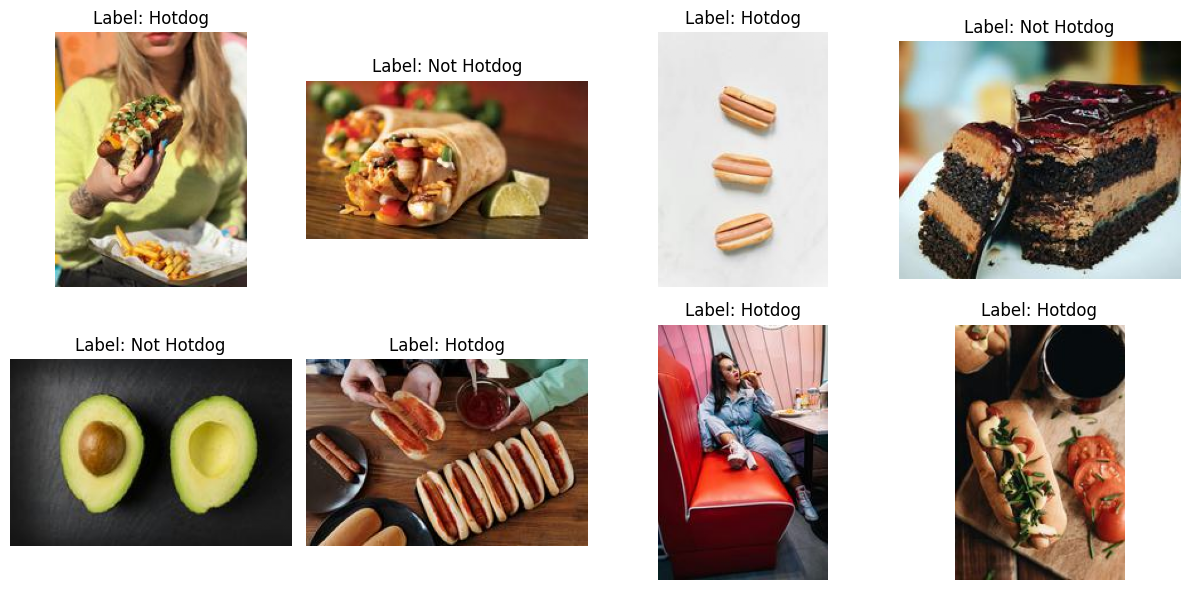

In [ ]:
from random import randint
from PIL import Image
import numpy as np
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def show_images_and_labels(dataset, num_images=8):
    to_tensor = ToTensor()
    images = []
    labels = []

    for _ in range(num_images):
        indx = randint(0, len(dataset) - 1)
        images.append(dataset[indx]['image'])
        labels.append(dataset[indx]['label'])

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()

    for i in range(num_images):
        ax = axes[i]
        img = images[i]

        if isinstance(img, Image.Image):
            img = to_tensor(img)

        img = img.permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        label_text = "Not Hotdog" if labels[i] == 1 else "Hotdog"
        ax.set_title(f"Label: {label_text}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_images_and_labels(new_ds, num_images=8)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

In [ ]:
def apply_transform(batch):
    batch['image'] = [transform(img) for img in batch['image']]
    return batch

In [ ]:
train_data = ds['train'].with_transform(apply_transform)
val_data = ds['validation'].with_transform(apply_transform)

In [ ]:
train_data[0]

{'image': tensor([[[ 0.8980,  0.7020,  0.3961,  ..., -0.4510,  0.0510,  0.0902],
          [ 0.9059,  0.7255,  0.3961,  ..., -0.7176, -0.1608,  0.0353],
          [ 0.8980,  0.7569,  0.3804,  ..., -0.8039, -0.3647,  0.0588],
          ...,
          [ 0.6471,  0.4118,  0.5608,  ...,  0.7255,  0.7176,  0.7098],
          [ 0.6706,  0.4431,  0.4510,  ...,  0.7412,  0.7255,  0.7176],
          [ 0.5373,  0.2941,  0.2863,  ...,  0.7333,  0.7176,  0.7020]],
 
         [[ 0.9608,  0.8118,  0.5608,  ..., -0.4039,  0.2392,  0.3255],
          [ 0.9686,  0.8275,  0.5529,  ..., -0.7647, -0.0667,  0.2471],
          [ 0.9608,  0.8510,  0.5451,  ..., -0.8431, -0.3412,  0.2549],
          ...,
          [ 0.7020,  0.4275,  0.6000,  ...,  0.7882,  0.7804,  0.7725],
          [ 0.7020,  0.4667,  0.5294,  ...,  0.8039,  0.7882,  0.7804],
          [ 0.5608,  0.3490,  0.3647,  ...,  0.8039,  0.7804,  0.7647]],
 
         [[ 0.9529,  0.8431,  0.6392,  ..., -0.4196,  0.3176,  0.4745],
          [ 0.9608,

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array([entry['image'].numpy() for entry in trainset])
y = np.array([entry['label'] for entry in trainset])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train_transform = X_train.reshape(X_train.shape[0], -1)
X_test_transform = X_test.reshape(X_test.shape[0], -1)


In [ ]:
y_train_transform = y_train.reshape(-1, 1).ravel()
y_test_transform = y_test.reshape(-1, 1)


In [ ]:
def precision_and_recall(y_pred, y_test):
  TP = np.sum((y_pred == 1) & (y_test == 1))
  FP = np.sum((y_pred == 1) & (y_test == 0))
  precision = TP / (TP + FP)
  recall = TP / np.sum(y_test == 1)
  return precision, recall

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RandomForest

rf_model = RandomForest(n_estimators=100, max_depth=3, random_state=80)
rf_model.fit(X_train_transform, y_train_transform)
y_pred = rf_model.predict(X_test_transform)
accuracy = accuracy_score(y_test_transform, y_pred)
print(f"RF Accuracy: {accuracy * 100:.2f}%")

RF Accuracy: 67.50%


In [ ]:
precision_rf, recall_rf = precision_and_recall(y_pred, y_test)

In [ ]:
print(f"Precision: {precision_rf * 100:.2f}%")
print(f"Recall: {recall_rf * 100:.2f}%")

Precision: 62.50%
Recall: 78.95%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_model.fit(X_train_transform, y_train_transform)
y_pred_knn = knn_model.predict(X_test_transform)
accuracy_knn = accuracy_score(y_test_transform, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

KNN Accuracy: 55.00%


In [ ]:
precision_knn, recall_knn = precision_and_recall(y_pred_knn, y_test)

In [ ]:
print(f"Precision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")

Precision: 53.85%
Recall: 36.84%


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train_transform, y_train_transform)
y_pred_svm = svm_model.predict(X_test_transform)
accuracy_svm = accuracy_score(y_test_transform, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 55.00%


In [ ]:
precision_svm, recall_svm = precision_and_recall(y_pred_svm, y_test)

In [ ]:
print(f"Precision: {precision_svm * 100:.2f}%")
print(f"Recall: {recall_svm * 100:.2f}%")

Precision: 52.00%
Recall: 68.42%


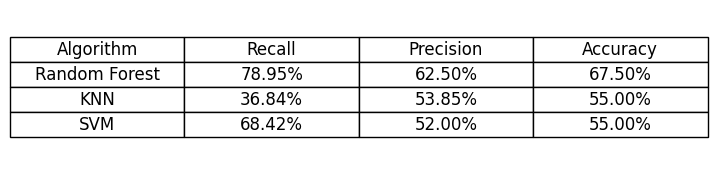

In [ ]:
import pandas as pd

# Data for the table
data = {
    "Algorithm": ["Random Forest", "KNN", "SVM"],
    "Recall": [f"{recall_rf * 100:.2f}%", f"{recall_knn * 100:.2f}%", f"{recall_svm * 100:.2f}%"],
    "Precision": [f"{precision_rf * 100:.2f}%", f"{precision_knn * 100:.2f}%", f"{precision_svm * 100:.2f}%"],
    "Accuracy": [f"{accuracy * 100:.2f}%", f"{accuracy_knn * 100:.2f}%", f"{accuracy_svm * 100:.2f}%"]
}
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()

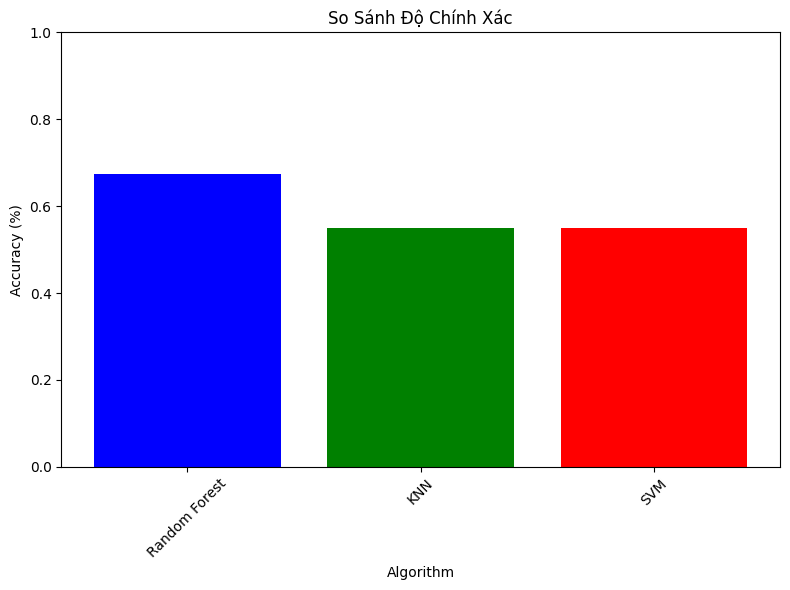

In [ ]:
accuracy_values = [accuracy, accuracy_knn, accuracy_svm]
algorithms = ['Random Forest', 'KNN', 'SVM']

plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('So Sánh Độ Chính Xác')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()